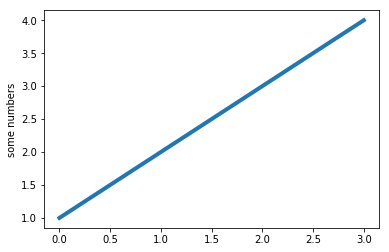

In [6]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], linewidth=4.0)
plt.ylabel('some numbers')
plt.show()

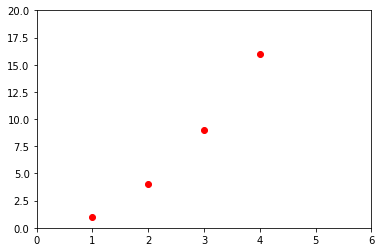

In [2]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

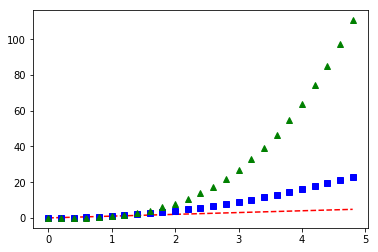

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

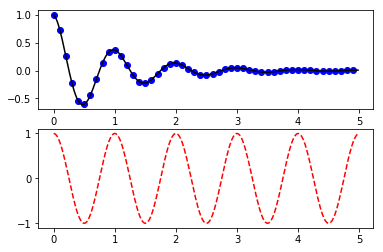

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

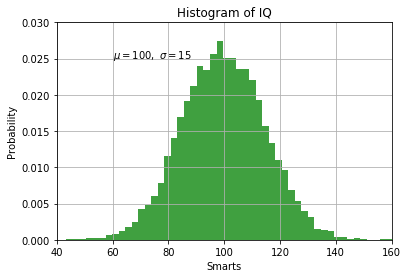

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

/home/weicc/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


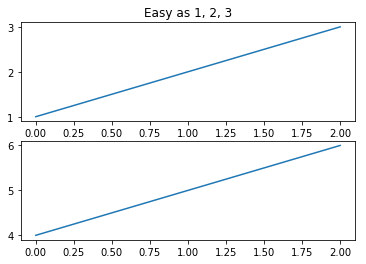

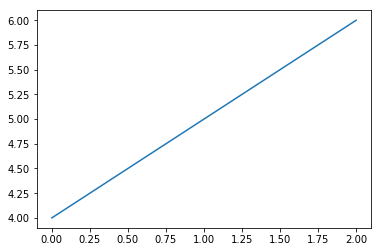

In [1]:
# bad example

import matplotlib.pyplot as plt
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title
plt.show()

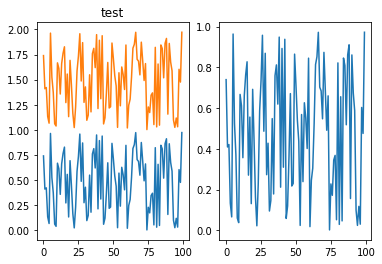

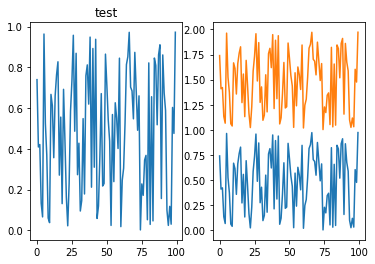

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
data = np.random.rand(100)

# Plot in different subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(data)

ax2.plot(data)

ax1.plot(data+1)

ax1.set_title('test')


fig2, (ax3, ax4) = plt.subplots(1, 2)
ax3.plot(data)

ax4.plot(data)

ax4.plot(data+1)

ax3.set_title('test')

plt.show()

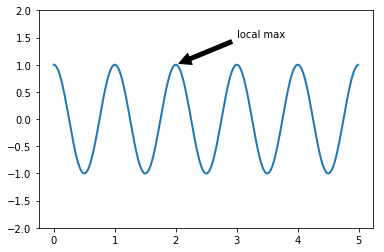

In [25]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)
plt.show()

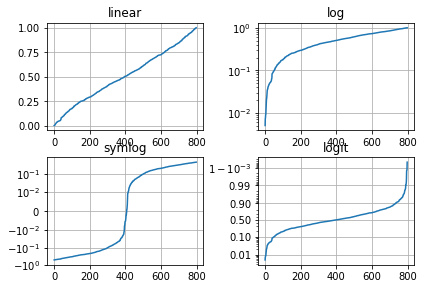

In [26]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

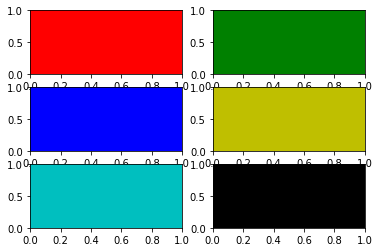

In [7]:
import matplotlib.pyplot as plt

for idx, color in enumerate('rgbyck'):
    plt.subplot(321 + idx, facecolor=color)
    
plt.show()

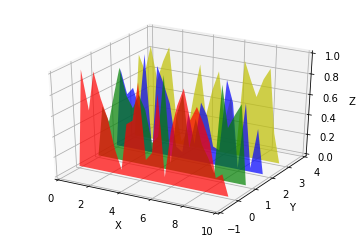

In [2]:
"""
=============================================
Generate polygons to fill under 3D line graph
=============================================

Demonstrate how to create polygons which fill the space under a line
graph. In this example polygons are semi-transparent, creating a sort
of 'jagged stained glass' effect.
"""

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')


def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)

xs = np.arange(0, 10, 0.4)
verts = []
zs = [0.0, 1.0, 2.0, 3.0]
for z in zs:
    ys = np.random.rand(len(xs))
    ys[0], ys[-1] = 0, 0
    verts.append(list(zip(xs, ys)))

poly = PolyCollection(verts, facecolors=[cc('r'), cc('g'), cc('b'),
                                         cc('y')])
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.set_xlabel('X')
ax.set_xlim3d(0, 10)
ax.set_ylabel('Y')
ax.set_ylim3d(-1, 4)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 1)

plt.show()

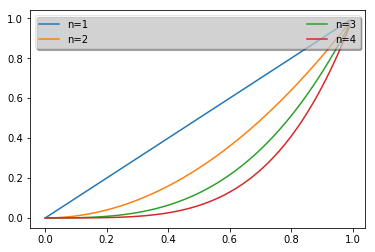

In [5]:
import matplotlib.pyplot as plt
import numpy as np


ax = plt.subplot(111)
t1 = np.arange(0.0, 1.0, 0.01)
for n in [1, 2, 3, 4]:
    plt.plot(t1, t1**n, label="n=%d"%(n,))

leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)


plt.show()

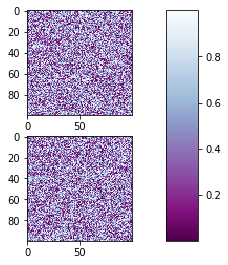

In [2]:
# Subplots Adjust

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.subplot(211)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)
plt.subplot(212)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)

plt.subplots_adjust(bottom=0.1, top=0.9, left=0.5, right=0.8)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)

plt.show()

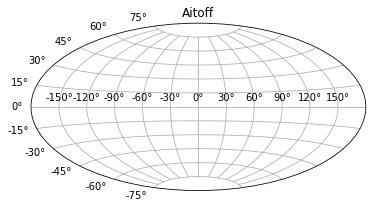

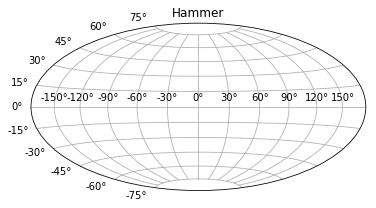

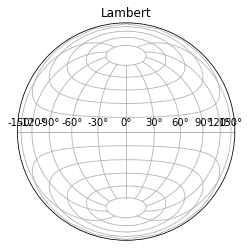

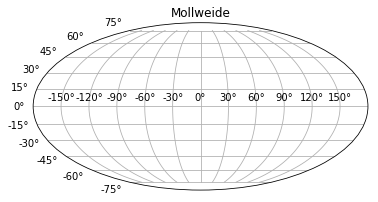

In [15]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.subplot(111, projection="aitoff")
plt.title("Aitoff")
plt.grid(True)

plt.figure(2)
plt.subplot(111, projection="hammer")
plt.title("Hammer")
plt.grid(True)

plt.figure(3)
plt.subplot(111, projection="lambert")
plt.title("Lambert")
plt.grid(True)

plt.figure(4)
plt.subplot(111, projection="mollweide")
plt.title("Mollweide")
plt.grid(True)

plt.show()

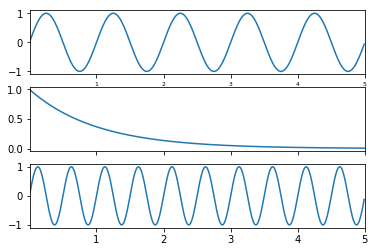

In [18]:
# Shared Axis Demo
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.01, 5.0, 0.01)
s1 = np.sin(2 * np.pi * t)
s2 = np.exp(-t)
s3 = np.sin(4 * np.pi * t)

ax1 = plt.subplot(311)
plt.plot(t, s1)
plt.setp(ax1.get_xticklabels(), fontsize=6)

# share x only
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(t, s2)
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)

# share x and y
ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(t, s3)
plt.xlim(0.01, 5.0)
plt.show()

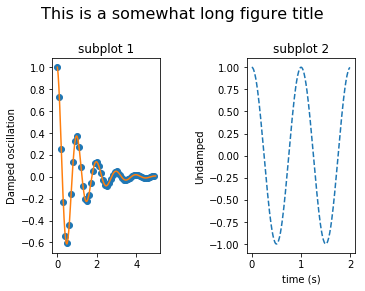

In [4]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np


def f(t):
    s1 = np.cos(2*np.pi*t)
    e1 = np.exp(-t)
    return s1 * e1

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
t3 = np.arange(0.0, 2.0, 0.01)


plt.subplot(121)
plt.plot(t1, f(t1), 'o', t2, f(t2), '-')
plt.title('subplot 1')
plt.ylabel('Damped oscillation')
plt.suptitle('This is a somewhat long figure title', fontsize=16)


plt.subplot(122)
plt.plot(t3, np.cos(2*np.pi*t3), '--')
plt.xlabel('time (s)')
plt.title('subplot 2')
plt.ylabel('Undamped')

plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)

plt.show()

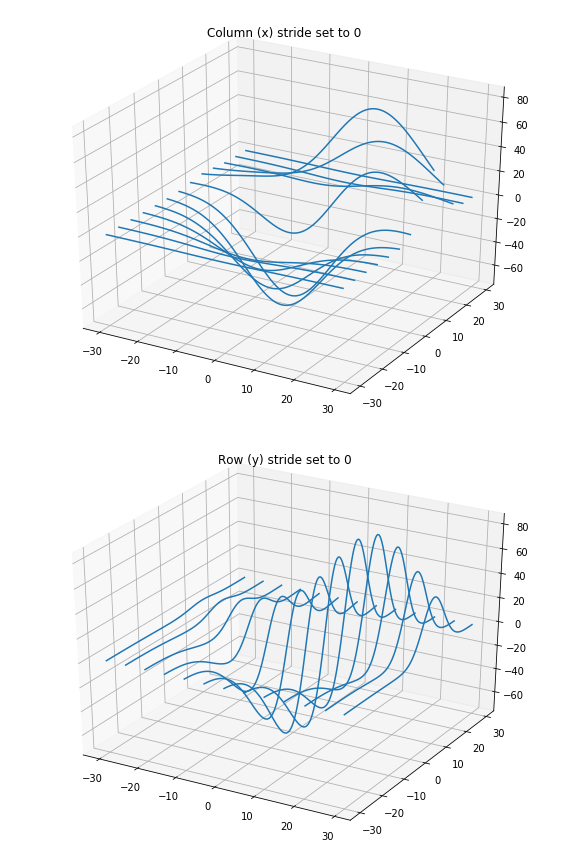

In [5]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(8, 12), subplot_kw={'projection': '3d'})

# Get the test data
X, Y, Z = axes3d.get_test_data(0.05)

# Give the first plot only wireframes of the type y = c
ax1.plot_wireframe(X, Y, Z, rstride=10, cstride=0)
ax1.set_title("Column (x) stride set to 0")

# Give the second plot only wireframes of the type x = c
ax2.plot_wireframe(X, Y, Z, rstride=0, cstride=10)
ax2.set_title("Row (y) stride set to 0")

plt.tight_layout()
plt.show()

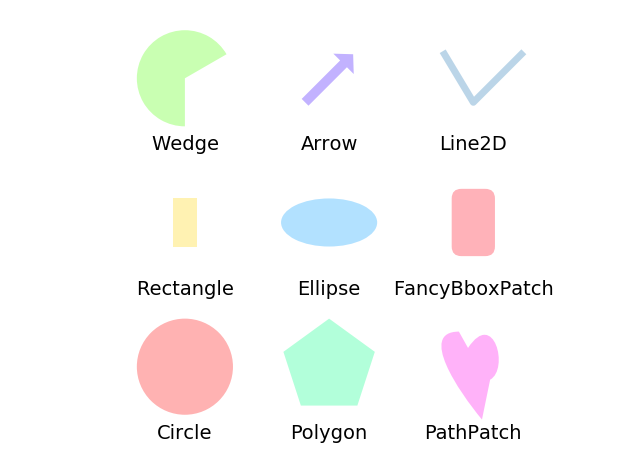

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection


plt.rcdefaults()


def label(xy, text):
    y = xy[1] - 0.15  # shift y-value for label so that it's below the artist
    plt.text(xy[0], y, text, ha="center", family='sans-serif', size=14)


fig, ax = plt.subplots()
# create 3x3 grid to plot the artists
grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T

patches = []

# add a circle
circle = mpatches.Circle(grid[0], 0.1, ec="none")
patches.append(circle)
label(grid[0], "Circle")

# add a rectangle
rect = mpatches.Rectangle(grid[1] - [0.025, 0.05], 0.05, 0.1, ec="none")
patches.append(rect)
label(grid[1], "Rectangle")

# add a wedge
wedge = mpatches.Wedge(grid[2], 0.1, 30, 270, ec="none")
patches.append(wedge)
label(grid[2], "Wedge")

# add a Polygon
polygon = mpatches.RegularPolygon(grid[3], 5, 0.1)
patches.append(polygon)
label(grid[3], "Polygon")

# add an ellipse
ellipse = mpatches.Ellipse(grid[4], 0.2, 0.1)
patches.append(ellipse)
label(grid[4], "Ellipse")

# add an arrow
arrow = mpatches.Arrow(grid[5, 0] - 0.05, grid[5, 1] - 0.05, 0.1, 0.1,
                       width=0.1)
patches.append(arrow)
label(grid[5], "Arrow")

# add a path patch
Path = mpath.Path
path_data = [
    (Path.MOVETO, [0.018, -0.11]),
    (Path.CURVE4, [-0.031, -0.051]),
    (Path.CURVE4, [-0.115, 0.073]),
    (Path.CURVE4, [-0.03, 0.073]),
    (Path.LINETO, [-0.011, 0.039]),
    (Path.CURVE4, [0.043, 0.121]),
    (Path.CURVE4, [0.075, -0.005]),
    (Path.CURVE4, [0.035, -0.027]),
    (Path.CLOSEPOLY, [0.018, -0.11])]
codes, verts = zip(*path_data)
path = mpath.Path(verts + grid[6], codes)
patch = mpatches.PathPatch(path)
patches.append(patch)
label(grid[6], "PathPatch")

# add a fancy box
fancybox = mpatches.FancyBboxPatch(
    grid[7] - [0.025, 0.05], 0.05, 0.1,
    boxstyle=mpatches.BoxStyle("Round", pad=0.02))
patches.append(fancybox)
label(grid[7], "FancyBboxPatch")

# add a line
x, y = np.array([[-0.06, 0.0, 0.1], [0.05, -0.05, 0.05]])
line = mlines.Line2D(x + grid[8, 0], y + grid[8, 1], lw=5., alpha=0.3)
label(grid[8], "Line2D")

colors = np.linspace(0, 1, len(patches))
collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.3)
collection.set_array(np.array(colors))
ax.add_collection(collection)
ax.add_line(line)

plt.axis('equal')
plt.axis('off')
plt.tight_layout()

plt.show()

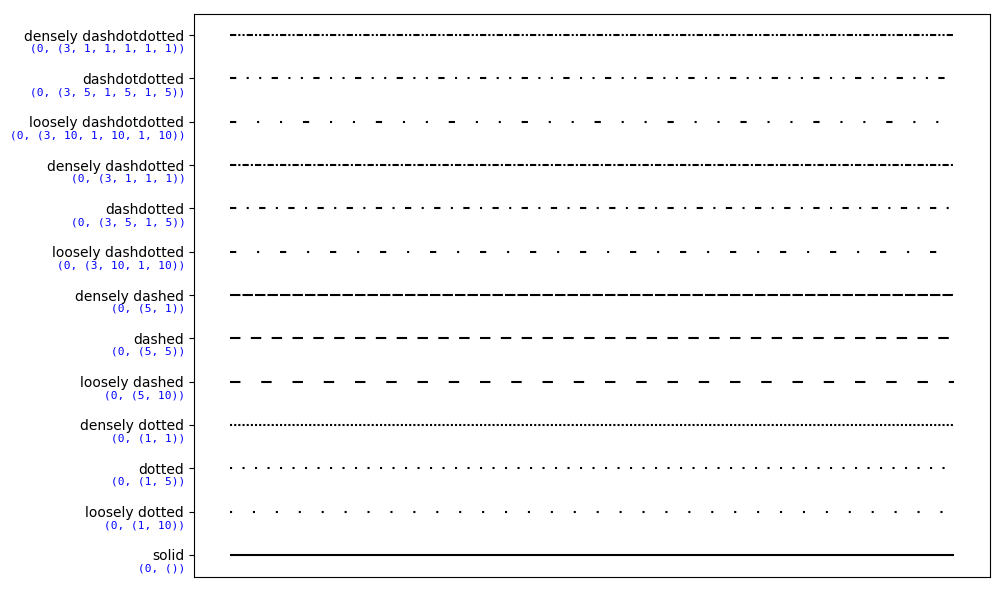

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from matplotlib.transforms import blended_transform_factory

linestyles = OrderedDict(
    [('solid',               (0, ())),
     ('loosely dotted',      (0, (1, 10))),
     ('dotted',              (0, (1, 5))),
     ('densely dotted',      (0, (1, 1))),

     ('loosely dashed',      (0, (5, 10))),
     ('dashed',              (0, (5, 5))),
     ('densely dashed',      (0, (5, 1))),

     ('loosely dashdotted',  (0, (3, 10, 1, 10))),
     ('dashdotted',          (0, (3, 5, 1, 5))),
     ('densely dashdotted',  (0, (3, 1, 1, 1))),

     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))])


plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 1, 1)

X, Y = np.linspace(0, 100, 10), np.zeros(10)
for i, (name, linestyle) in enumerate(linestyles.items()):
    ax.plot(X, Y+i, linestyle=linestyle, linewidth=1.5, color='black')

ax.set_ylim(-0.5, len(linestyles)-0.5)
plt.yticks(np.arange(len(linestyles)), linestyles.keys())
plt.xticks([])

# For each line style, add a text annotation with a small offset from
# the reference point (0 in Axes coords, y tick value in Data coords).
reference_transform = blended_transform_factory(ax.transAxes, ax.transData)
for i, (name, linestyle) in enumerate(linestyles.items()):
    ax.annotate(str(linestyle), xy=(0.0, i), xycoords=reference_transform,
                xytext=(-6, -12), textcoords='offset points', color="blue",
                fontsize=8, ha="right", family="monospace")

plt.tight_layout()
plt.show()

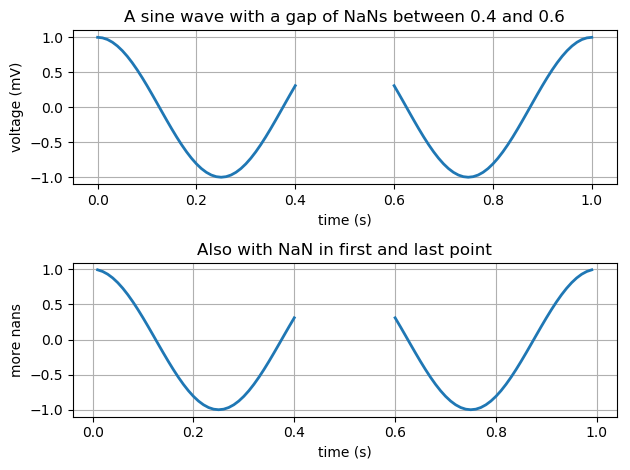

In [8]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.0, 1.0 + 0.01, 0.01)
s = np.cos(2 * 2*np.pi * t)
t[41:60] = np.nan

plt.subplot(2, 1, 1)
plt.plot(t, s, '-', lw=2)

plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('A sine wave with a gap of NaNs between 0.4 and 0.6')
plt.grid(True)

plt.subplot(2, 1, 2)
t[0] = np.nan
t[-1] = np.nan
plt.plot(t, s, '-', lw=2)
plt.title('Also with NaN in first and last point')

plt.xlabel('time (s)')
plt.ylabel('more nans')
plt.grid(True)

plt.tight_layout()
plt.show()

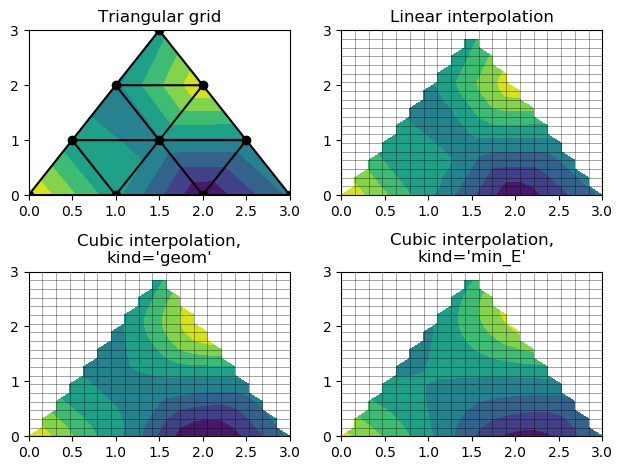

In [9]:
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import numpy as np

# Create triangulation.
x = np.asarray([0, 1, 2, 3, 0.5, 1.5, 2.5, 1, 2, 1.5])
y = np.asarray([0, 0, 0, 0, 1.0, 1.0, 1.0, 2, 2, 3.0])
triangles = [[0, 1, 4], [1, 2, 5], [2, 3, 6], [1, 5, 4], [2, 6, 5], [4, 5, 7],
             [5, 6, 8], [5, 8, 7], [7, 8, 9]]
triang = mtri.Triangulation(x, y, triangles)

# Interpolate to regularly-spaced quad grid.
z = np.cos(1.5 * x) * np.cos(1.5 * y)
xi, yi = np.meshgrid(np.linspace(0, 3, 20), np.linspace(0, 3, 20))

interp_lin = mtri.LinearTriInterpolator(triang, z)
zi_lin = interp_lin(xi, yi)

interp_cubic_geom = mtri.CubicTriInterpolator(triang, z, kind='geom')
zi_cubic_geom = interp_cubic_geom(xi, yi)

interp_cubic_min_E = mtri.CubicTriInterpolator(triang, z, kind='min_E')
zi_cubic_min_E = interp_cubic_min_E(xi, yi)


# Plot the triangulation.
plt.subplot(221)
plt.tricontourf(triang, z)
plt.triplot(triang, 'ko-')
plt.title('Triangular grid')

# Plot linear interpolation to quad grid.
plt.subplot(222)
plt.contourf(xi, yi, zi_lin)
plt.plot(xi, yi, 'k-', lw=0.5, alpha=0.5)
plt.plot(xi.T, yi.T, 'k-', lw=0.5, alpha=0.5)
plt.title("Linear interpolation")

# Plot cubic interpolation to quad grid, kind=geom
plt.subplot(223)
plt.contourf(xi, yi, zi_cubic_geom)
plt.plot(xi, yi, 'k-', lw=0.5, alpha=0.5)
plt.plot(xi.T, yi.T, 'k-', lw=0.5, alpha=0.5)
plt.title("Cubic interpolation,\nkind='geom'")

# Plot cubic interpolation to quad grid, kind=min_E
plt.subplot(224)
plt.contourf(xi, yi, zi_cubic_min_E)
plt.plot(xi, yi, 'k-', lw=0.5, alpha=0.5)
plt.plot(xi.T, yi.T, 'k-', lw=0.5, alpha=0.5)
plt.title("Cubic interpolation,\nkind='min_E'")

plt.tight_layout()
plt.show()

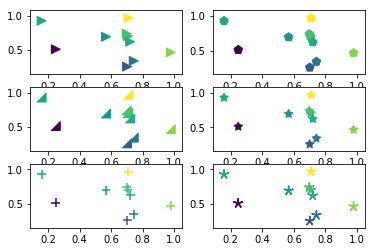

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


x = np.random.rand(10)
y = np.random.rand(10)
z = np.sqrt(x**2 + y**2)

plt.subplot(321)
plt.scatter(x, y, s=80, c=z, marker=">")

plt.subplot(322)
plt.scatter(x, y, s=80, c=z, marker=(5, 0))

verts = list(zip([-1., 1., 1., -1.], [-1., -1., 1., -1.]))
plt.subplot(323)
plt.scatter(x, y, s=80, c=z, marker=(verts, 0))
# equivalent:
# plt.scatter(x, y, s=80, c=z, marker=None, verts=verts)

plt.subplot(324)
plt.scatter(x, y, s=80, c=z, marker=(5, 1))

plt.subplot(325)
plt.scatter(x, y, s=80, c=z, marker='+')

plt.subplot(326)
plt.scatter(x, y, s=80, c=z, marker=(5, 2))

plt.show()

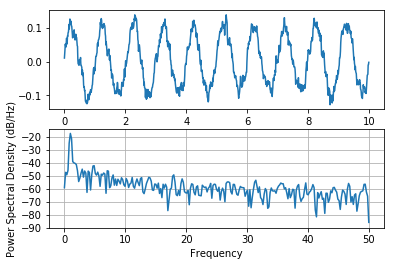

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

# Fixing random state for reproducibility
np.random.seed(19680801)


dt = 0.01
t = np.arange(0, 10, dt)
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)

cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]
s = 0.1 * np.sin(2 * np.pi * t) + cnse

plt.subplot(211)
plt.plot(t, s)
plt.subplot(212)
plt.psd(s, 512, 1 / dt)

plt.show()

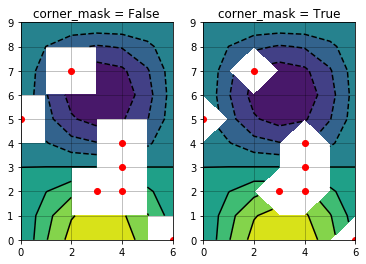

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data to plot.
x, y = np.meshgrid(np.arange(7), np.arange(10))
z = np.sin(0.5 * x) * np.cos(0.52 * y)

# Mask various z values.
mask = np.zeros_like(z, dtype=bool)
mask[2, 3:5] = True
mask[3:5, 4] = True
mask[7, 2] = True
mask[5, 0] = True
mask[0, 6] = True
z = np.ma.array(z, mask=mask)

corner_masks = [False, True]
for i, corner_mask in enumerate(corner_masks):
    plt.subplot(1, 2, i + 1)
    cs = plt.contourf(x, y, z, corner_mask=corner_mask)
    plt.contour(cs, colors='k')
    plt.title('corner_mask = {0}'.format(corner_mask))

    # Plot grid.
    plt.grid(c='k', ls='-', alpha=0.3)

    # Indicate masked points with red circles.
    plt.plot(np.ma.array(x, mask=~mask), y, 'ro')

plt.show()

griddata and contour: 0.120000 seconds
tricontour: 0.110000 seconds


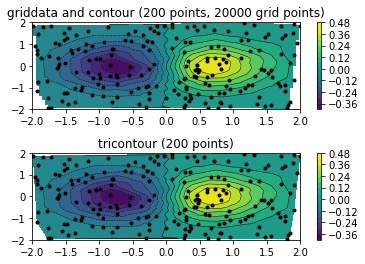

In [6]:
from __future__ import print_function
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import matplotlib.mlab as mlab
import time

np.random.seed(0)
npts = 200
ngridx = 100
ngridy = 200
x = np.random.uniform(-2, 2, npts)
y = np.random.uniform(-2, 2, npts)
z = x * np.exp(-x**2 - y**2)

# griddata and contour.
start = time.clock()
plt.subplot(211)
xi = np.linspace(-2.1, 2.1, ngridx)
yi = np.linspace(-2.1, 2.1, ngridy)
zi = mlab.griddata(x, y, z, xi, yi, interp='linear')
plt.contour(xi, yi, zi, 15, linewidths=0.5, colors='k')
plt.contourf(xi, yi, zi, 15,
             norm=plt.Normalize(vmax=abs(zi).max(), vmin=-abs(zi).max()))
plt.colorbar()  # draw colorbar
plt.plot(x, y, 'ko', ms=3)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('griddata and contour (%d points, %d grid points)' %
          (npts, ngridx * ngridy))
print('griddata and contour: %f seconds' % (time.clock() - start))

# tricontour.
start = time.clock()
plt.subplot(212)
triang = tri.Triangulation(x, y)
plt.tricontour(x, y, z, 15, linewidths=0.5, colors='k')
plt.tricontourf(x, y, z, 15,
                norm=plt.Normalize(vmax=abs(zi).max(), vmin=-abs(zi).max()))
plt.colorbar()
plt.plot(x, y, 'ko', ms=3)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('tricontour (%d points)' % npts)
print('tricontour: %f seconds' % (time.clock() - start))

plt.subplots_adjust(hspace=0.5)

plt.show()

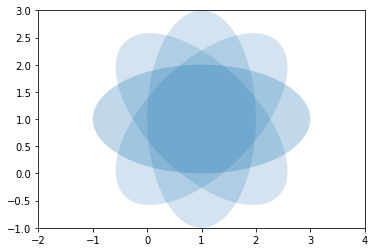

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

delta = 45.0  # degrees

angles = np.arange(0, 360 + delta, delta)
ells = [Ellipse((1, 1), 4, 2, a) for a in angles]

a = plt.subplot(111, aspect='equal')

for e in ells:
    e.set_clip_box(a.bbox)
    e.set_alpha(0.1)
    a.add_artist(e)

plt.xlim(-2, 4)
plt.ylim(-1, 3)

plt.show()

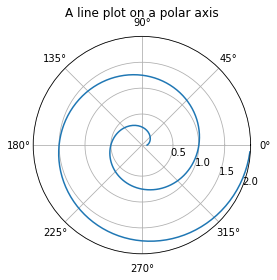

In [8]:
import numpy as np
import matplotlib.pyplot as plt


r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

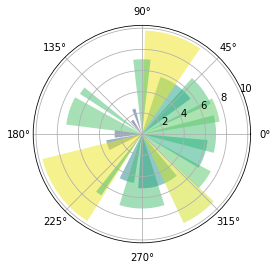

In [9]:
import numpy as np
import matplotlib.pyplot as plt


# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)

ax = plt.subplot(111, projection='polar')
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.viridis(r / 10.))
    bar.set_alpha(0.5)

plt.show()

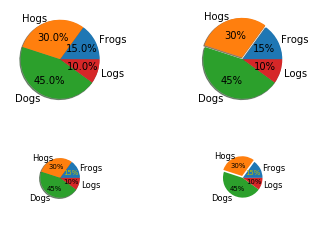

In [10]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Some data

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15, 30, 45, 10]

explode = (0, 0.05, 0, 0)

# Make square figures and axes

the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 0], aspect=1)

plt.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

plt.subplot(the_grid[0, 1], aspect=1)

plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)

plt.subplot(the_grid[1, 0], aspect=1)

patches, texts, autotexts = plt.pie(fracs, labels=labels,
                                    autopct='%.0f%%',
                                    shadow=True, radius=0.5)

# Make the labels on the small plot easier to read.
for t in texts:
    t.set_size('smaller')
for t in autotexts:
    t.set_size('x-small')
autotexts[0].set_color('y')

plt.subplot(the_grid[1, 1], aspect=1)

# Turn off shadow for tiny plot with exploded slice.
patches, texts, autotexts = plt.pie(fracs, explode=explode,
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=0.5)
for t in texts:
    t.set_size('smaller')
for t in autotexts:
    t.set_size('x-small')
autotexts[0].set_color('y')

plt.show()

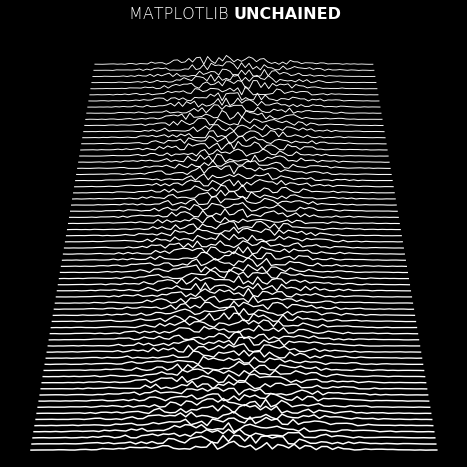

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


# Create new Figure with black background
fig = plt.figure(figsize=(8, 8), facecolor='black')

# Add a subplot with no frame
ax = plt.subplot(111, frameon=False)

# Generate random data
data = np.random.uniform(0, 1, (64, 75))
X = np.linspace(-1, 1, data.shape[-1])
G = 1.5 * np.exp(-4 * X ** 2)

# Generate line plots
lines = []
for i in range(len(data)):
    # Small reduction of the X extents to get a cheap perspective effect
    xscale = 1 - i / 200.
    # Same for linewidth (thicker strokes on bottom)
    lw = 1.5 - i / 100.0
    line, = ax.plot(xscale * X, i + G * data[i], color="w", lw=lw)
    lines.append(line)

# Set y limit (or first line is cropped because of thickness)
ax.set_ylim(-1, 70)

# No ticks
ax.set_xticks([])
ax.set_yticks([])

# 2 part titles to get different font weights
ax.text(0.5, 1.0, "MATPLOTLIB ", transform=ax.transAxes,
        ha="right", va="bottom", color="w",
        family="sans-serif", fontweight="light", fontsize=16)
ax.text(0.5, 1.0, "UNCHAINED", transform=ax.transAxes,
        ha="left", va="bottom", color="w",
        family="sans-serif", fontweight="bold", fontsize=16)


def update(*args):
    # Shift all data to the right
    data[:, 1:] = data[:, :-1]

    # Fill-in new values
    data[:, 0] = np.random.uniform(0, 1, len(data))

    # Update data
    for i in range(len(data)):
        lines[i].set_ydata(i + G * data[i])

    # Return modified artists
    return lines

# Construct the animation, using the update function as the animation
# director.
anim = animation.FuncAnimation(fig, update, interval=10)
plt.show()

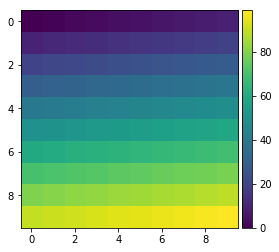

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

ax = plt.subplot(111)
im = ax.imshow(np.arange(100).reshape((10, 10)))

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)
plt.show()

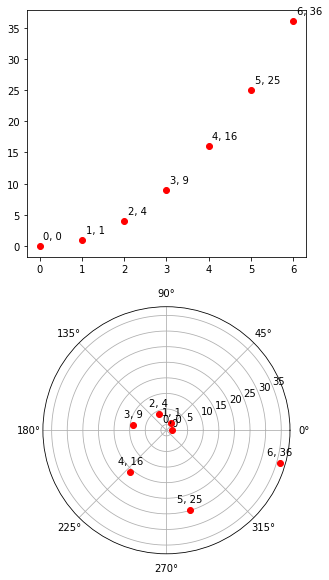

In [16]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import numpy as np

from matplotlib.transforms import offset_copy

xs = np.arange(7)
ys = xs**2

fig = plt.figure(figsize=(5, 10))
ax = plt.subplot(2, 1, 1)

# If we want the same offset for each text instance,
# we only need to make one transform.  To get the
# transform argument to offset_copy, we need to make the axes
# first; the subplot command above is one way to do this.
trans_offset = mtransforms.offset_copy(ax.transData, fig=fig,
                                       x=0.05, y=0.10, units='inches')

for x, y in zip(xs, ys):
    plt.plot((x,), (y,), 'ro')
    plt.text(x, y, '%d, %d' % (int(x), int(y)), transform=trans_offset)


# offset_copy works for polar plots also.
ax = plt.subplot(2, 1, 2, projection='polar')

trans_offset = mtransforms.offset_copy(ax.transData, fig=fig,
                                       y=6, units='dots')

for x, y in zip(xs, ys):
    plt.polar((x,), (y,), 'ro')
    plt.text(x, y, '%d, %d' % (int(x), int(y)),
             transform=trans_offset,
             horizontalalignment='center',
             verticalalignment='bottom')

plt.show()

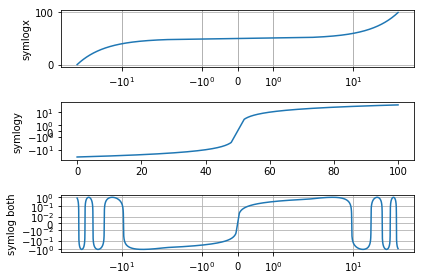

In [19]:
import matplotlib.pyplot as plt
import numpy as np

dt = 0.01
x = np.arange(-50.0, 50.0, dt)
y = np.arange(0, 100.0, dt)

plt.subplot(311)
plt.plot(x, y)
plt.xscale('symlog')
plt.ylabel('symlogx')
plt.grid(True)
plt.gca().xaxis.grid(True, which='minor')  # minor grid on too

plt.subplot(312)
plt.plot(y, x)
plt.yscale('symlog')
plt.ylabel('symlogy')

plt.subplot(313)
plt.plot(x, np.sin(x / 3.0))
plt.xscale('symlog')
plt.yscale('symlog', linthreshy=0.015)
plt.grid(True)
plt.ylabel('symlog both')

plt.tight_layout()
plt.show()

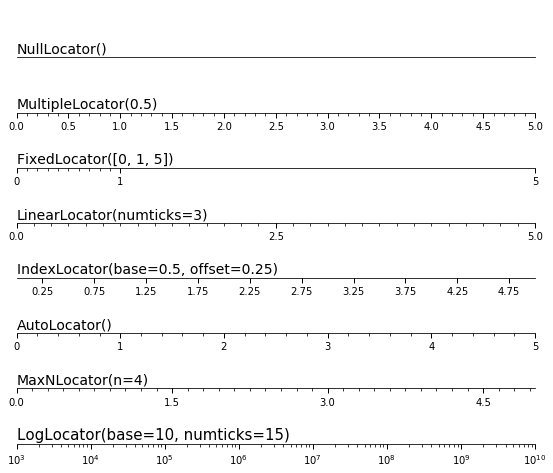

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Setup a plot such that only the bottom spine is shown
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)


plt.figure(figsize=(8, 6))
n = 8

# Null Locator
ax = plt.subplot(n, 1, 1)
setup(ax)
ax.xaxis.set_major_locator(ticker.NullLocator())
ax.xaxis.set_minor_locator(ticker.NullLocator())
ax.text(0.0, 0.1, "NullLocator()", fontsize=14, transform=ax.transAxes)

# Multiple Locator
ax = plt.subplot(n, 1, 2)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.text(0.0, 0.1, "MultipleLocator(0.5)", fontsize=14,
        transform=ax.transAxes)

# Fixed Locator
ax = plt.subplot(n, 1, 3)
setup(ax)
majors = [0, 1, 5]
ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
minors = np.linspace(0, 1, 11)[1:-1]
ax.xaxis.set_minor_locator(ticker.FixedLocator(minors))
ax.text(0.0, 0.1, "FixedLocator([0, 1, 5])", fontsize=14,
        transform=ax.transAxes)

# Linear Locator
ax = plt.subplot(n, 1, 4)
setup(ax)
ax.xaxis.set_major_locator(ticker.LinearLocator(3))
ax.xaxis.set_minor_locator(ticker.LinearLocator(31))
ax.text(0.0, 0.1, "LinearLocator(numticks=3)",
        fontsize=14, transform=ax.transAxes)

# Index Locator
ax = plt.subplot(n, 1, 5)
setup(ax)
ax.plot(range(0, 5), [0]*5, color='White')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=.5, offset=.25))
ax.text(0.0, 0.1, "IndexLocator(base=0.5, offset=0.25)",
        fontsize=14, transform=ax.transAxes)

# Auto Locator
ax = plt.subplot(n, 1, 6)
setup(ax)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.text(0.0, 0.1, "AutoLocator()", fontsize=14, transform=ax.transAxes)

# MaxN Locator
ax = plt.subplot(n, 1, 7)
setup(ax)
ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(40))
ax.text(0.0, 0.1, "MaxNLocator(n=4)", fontsize=14, transform=ax.transAxes)

# Log Locator
ax = plt.subplot(n, 1, 8)
setup(ax)
ax.set_xlim(10**3, 10**10)
ax.set_xscale('log')
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax.text(0.0, 0.1, "LogLocator(base=10, numticks=15)",
        fontsize=15, transform=ax.transAxes)

# Push the top of the top axes outside the figure because we only show the
# bottom spine.
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)

plt.show()

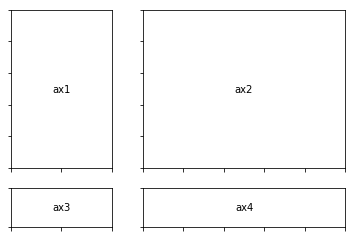

In [21]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


def make_ticklabels_invisible(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)


f = plt.figure()

gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1, 2], height_ratios=[4, 1])

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

make_ticklabels_invisible(f)
plt.show()

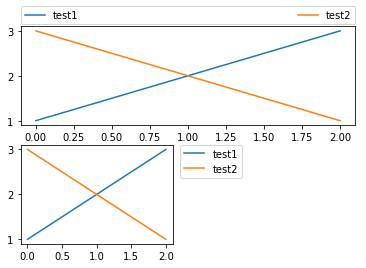

In [1]:
import matplotlib.pyplot as plt

plt.subplot(211)
plt.plot([1, 2, 3], label="test1")
plt.plot([3, 2, 1], label="test2")

# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(223)
plt.plot([1, 2, 3], label="test1")
plt.plot([3, 2, 1], label="test2")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

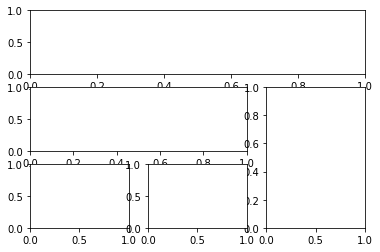

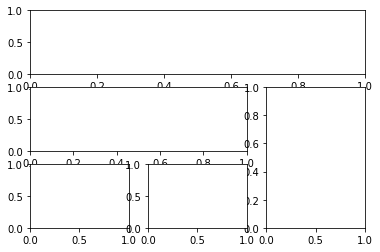

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax5 = plt.subplot2grid((3, 3), (2, 1))

fig = plt.figure()
gs = gridspec.GridSpec(3, 3)
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, :-1])
ax3 = plt.subplot(gs[1:, -1])
ax4 = plt.subplot(gs[-1, 0])
ax5 = plt.subplot(gs[-1, -2])
plt.show()

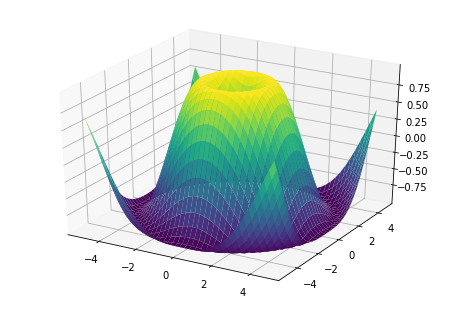

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)

plt.show()

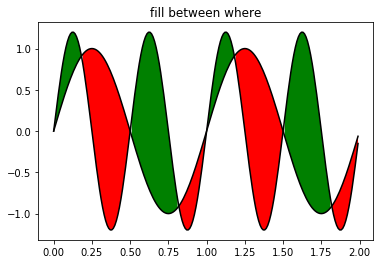

In [7]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2*np.pi*x)
y2 = 1.2*np.sin(4*np.pi*x)

fig, ax = plt.subplots()
ax.plot(x, y1, x, y2, color='black')
ax.fill_between(x, y1, y2, where=y2>y1, facecolor='green')
ax.fill_between(x, y1, y2, where=y2<=y1, facecolor='red')
ax.set_title('fill between where')

plt.show()

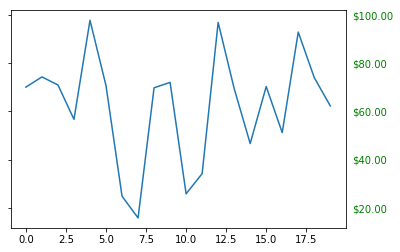

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(100*np.random.rand(20))

formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)

for tick in ax.yaxis.get_major_ticks():
    tick.label1On = False
    tick.label2On = True
    tick.label2.set_color('green')

plt.show()

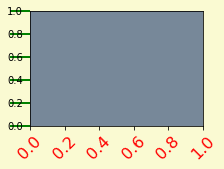

In [14]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
rect = fig.patch # a rectangle instance
rect.set_facecolor('lightgoldenrodyellow')

ax1 = fig.add_axes([0.1, 0.3, 0.4, 0.4])
rect = ax1.patch
rect.set_facecolor('lightslategray')


for label in ax1.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('red')
    label.set_rotation(45)
    label.set_fontsize(16)

for line in ax1.yaxis.get_ticklines():
    # line is a Line2D instance
    line.set_color('green')
    line.set_markersize(20)
    line.set_markeredgewidth(2)

plt.show()

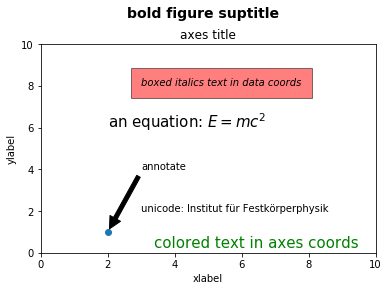

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, u'unicode: Institut f\374r Festk\366rperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()

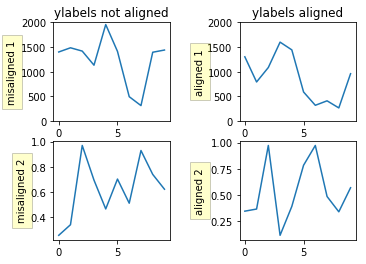

In [16]:
import numpy as np
import matplotlib.pyplot as plt

box = dict(facecolor='yellow', pad=5, alpha=0.2)

fig = plt.figure()
fig.subplots_adjust(left=0.2, wspace=0.6)

# Fixing random state for reproducibility
np.random.seed(19680801)

ax1 = fig.add_subplot(221)
ax1.plot(2000*np.random.rand(10))
ax1.set_title('ylabels not aligned')
ax1.set_ylabel('misaligned 1', bbox=box)
ax1.set_ylim(0, 2000)
ax3 = fig.add_subplot(223)
ax3.set_ylabel('misaligned 2',bbox=box)
ax3.plot(np.random.rand(10))


labelx = -0.3  # axes coords

ax2 = fig.add_subplot(222)
ax2.set_title('ylabels aligned')
ax2.plot(2000*np.random.rand(10))
ax2.set_ylabel('aligned 1', bbox=box)
ax2.yaxis.set_label_coords(labelx, 0.5)
ax2.set_ylim(0, 2000)

ax4 = fig.add_subplot(224)
ax4.plot(np.random.rand(10))
ax4.set_ylabel('aligned 2', bbox=box)
ax4.yaxis.set_label_coords(labelx, 0.5)


plt.show()

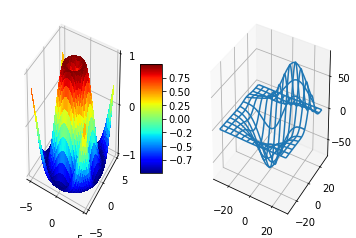

In [17]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
#from matplotlib.ticker import LinearLocator, FixedLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

ax = fig.add_subplot(1, 2, 1, projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet,
        linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01)

#ax.w_zaxis.set_major_locator(LinearLocator(10))
#ax.w_zaxis.set_major_formatter(FormatStrFormatter('%.03f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

from mpl_toolkits.mplot3d.axes3d import get_test_data
ax = fig.add_subplot(1, 2, 2, projection='3d')
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

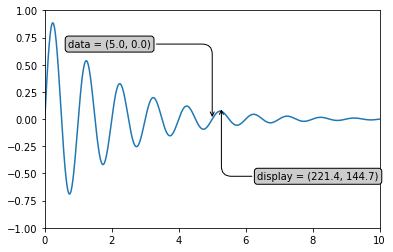

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

xdata, ydata = 5, 0
xdisplay, ydisplay = ax.transData.transform_point((xdata, ydata))

bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle,angleA=0,angleB=90,rad=10")

offset = 72
ax.annotate('data = (%.1f, %.1f)'%(xdata, ydata),
            (xdata, ydata), xytext=(-2*offset, offset), textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)


disp = ax.annotate('display = (%.1f, %.1f)'%(xdisplay, ydisplay),
            (xdisplay, ydisplay), xytext=(0.5*offset, -offset),
            xycoords='figure pixels',
            textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)


plt.show()

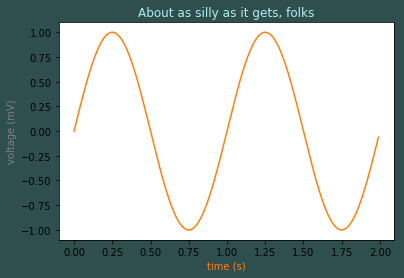

In [19]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2 * np.pi * t)

fig, ax = plt.subplots(facecolor='darkslategray')
ax.plot(t, s, 'C1')
ax.set_xlabel('time (s)', color='C1')
ax.set_ylabel('voltage (mV)', color='0.5')  # grayscale color
ax.set_title('About as silly as it gets, folks', color='#afeeee')

plt.show()

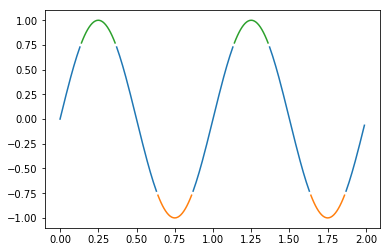

In [20]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2 * np.pi * t)

upper = 0.77
lower = -0.77


supper = np.ma.masked_where(s < upper, s)
slower = np.ma.masked_where(s > lower, s)
smiddle = np.ma.masked_where(np.logical_or(s < lower, s > upper), s)

fig, ax = plt.subplots()
ax.plot(t, smiddle, t, slower, t, supper)
plt.show()

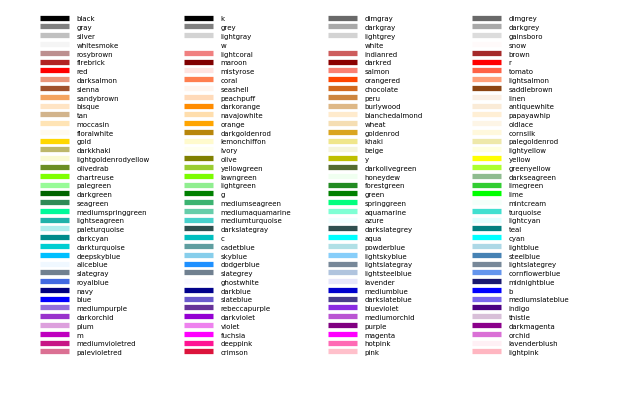

In [21]:
from __future__ import division

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

n = len(sorted_names)
ncols = 4
nrows = n // ncols + 1

fig, ax = plt.subplots(figsize=(8, 5))

# Get height and width
X, Y = fig.get_dpi() * fig.get_size_inches()
h = Y / (nrows + 1)
w = X / ncols

for i, name in enumerate(sorted_names):
    col = i % ncols
    row = i // ncols
    y = Y - (row * h) - h

    xi_line = w * (col + 0.05)
    xf_line = w * (col + 0.25)
    xi_text = w * (col + 0.3)

    ax.text(xi_text, y, name, fontsize=(h * 0.8),
            horizontalalignment='left',
            verticalalignment='center')

    ax.hlines(y + h * 0.1, xi_line, xf_line,
              color=colors[name], linewidth=(h * 0.6))

ax.set_xlim(0, X)
ax.set_ylim(0, Y)
ax.set_axis_off()

fig.subplots_adjust(left=0, right=1,
                    top=1, bottom=0,
                    hspace=0, wspace=0)
plt.show()

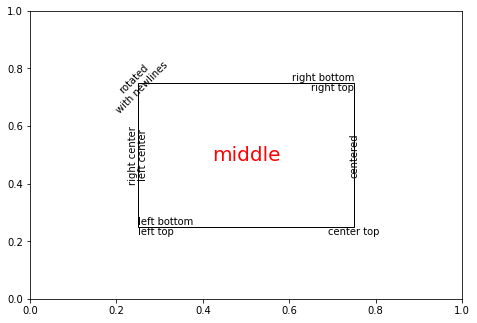

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# axes coordinates are 0,0 is bottom left and 1,1 is upper right
p = patches.Rectangle(
    (left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False
    )

ax.add_patch(p)

ax.text(left, bottom, 'left top',
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes)

ax.text(left, bottom, 'left bottom',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes)

ax.text(right, top, 'right bottom',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)

ax.text(right, top, 'right top',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes)

ax.text(right, bottom, 'center top',
        horizontalalignment='center',
        verticalalignment='top',
        transform=ax.transAxes)

ax.text(left, 0.5*(bottom+top), 'right center',
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)

ax.text(left, 0.5*(bottom+top), 'left center',
        horizontalalignment='left',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)

ax.text(0.5*(left+right), 0.5*(bottom+top), 'middle',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='red',
        transform=ax.transAxes)

ax.text(right, 0.5*(bottom+top), 'centered',
        horizontalalignment='center',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)

ax.text(left, top, 'rotated\nwith newlines',
        horizontalalignment='center',
        verticalalignment='center',
        rotation=45,
        transform=ax.transAxes)

# ax.set_axis_off()
plt.show()

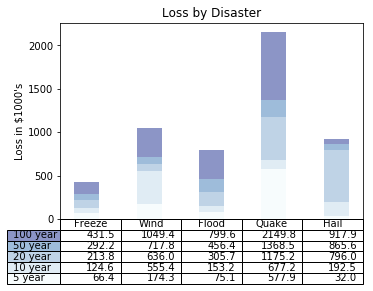

In [24]:
import numpy as np
import matplotlib.pyplot as plt


data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

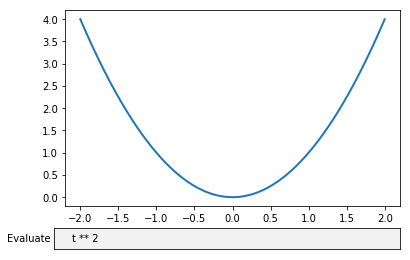

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import TextBox
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
t = np.arange(-2.0, 2.0, 0.001)
s = t ** 2
initial_text = "t ** 2"
l, = plt.plot(t, s, lw=2)


def submit(text):
    ydata = eval(text)
    l.set_ydata(ydata)
    ax.set_ylim(np.min(ydata), np.max(ydata))
    plt.draw()

axbox = plt.axes([0.1, 0.05, 0.8, 0.075])
text_box = TextBox(axbox, 'Evaluate', initial=initial_text)
text_box.on_submit(submit)

plt.show()

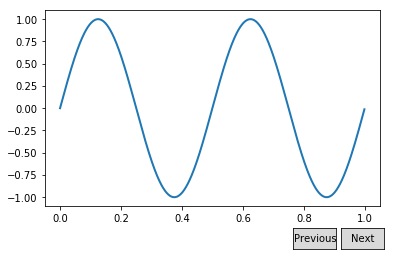

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

freqs = np.arange(2, 20, 3)

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2*np.pi*freqs[0]*t)
l, = plt.plot(t, s, lw=2)


class Index(object):
    ind = 0

    def next(self, event):
        self.ind += 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

    def prev(self, event):
        self.ind -= 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

callback = Index()
axprev = plt.axes([0.7, 0.05, 0.1, 0.075])
axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()

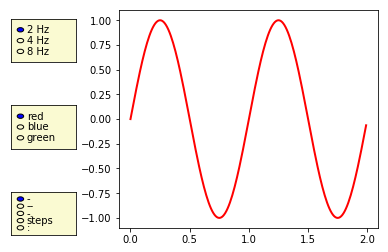

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons

t = np.arange(0.0, 2.0, 0.01)
s0 = np.sin(2*np.pi*t)
s1 = np.sin(4*np.pi*t)
s2 = np.sin(8*np.pi*t)

fig, ax = plt.subplots()
l, = ax.plot(t, s0, lw=2, color='red')
plt.subplots_adjust(left=0.3)

axcolor = 'lightgoldenrodyellow'
rax = plt.axes([0.05, 0.7, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('2 Hz', '4 Hz', '8 Hz'))


def hzfunc(label):
    hzdict = {'2 Hz': s0, '4 Hz': s1, '8 Hz': s2}
    ydata = hzdict[label]
    l.set_ydata(ydata)
    plt.draw()
radio.on_clicked(hzfunc)

rax = plt.axes([0.05, 0.4, 0.15, 0.15], facecolor=axcolor)
radio2 = RadioButtons(rax, ('red', 'blue', 'green'))


def colorfunc(label):
    l.set_color(label)
    plt.draw()
radio2.on_clicked(colorfunc)

rax = plt.axes([0.05, 0.1, 0.15, 0.15], facecolor=axcolor)
radio3 = RadioButtons(rax, ('-', '--', '-.', 'steps', ':'))


def stylefunc(label):
    l.set_linestyle(label)
    plt.draw()
radio3.on_clicked(stylefunc)

plt.show()

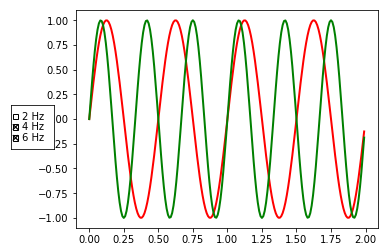

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import CheckButtons

t = np.arange(0.0, 2.0, 0.01)
s0 = np.sin(2*np.pi*t)
s1 = np.sin(4*np.pi*t)
s2 = np.sin(6*np.pi*t)

fig, ax = plt.subplots()
l0, = ax.plot(t, s0, visible=False, lw=2, color='k', label='2 Hz')
l1, = ax.plot(t, s1, lw=2, color='r', label='4 Hz')
l2, = ax.plot(t, s2, lw=2, color='g', label='6 Hz')
plt.subplots_adjust(left=0.2)

lines = [l0, l1, l2]

# Make checkbuttons with all plotted lines with correct visibility
rax = plt.axes([0.05, 0.4, 0.1, 0.15])
labels = [str(line.get_label()) for line in lines]
visibility = [line.get_visible() for line in lines]
check = CheckButtons(rax, labels, visibility)


def func(label):
    index = labels.index(label)
    lines[index].set_visible(not lines[index].get_visible())
    plt.draw()

check.on_clicked(func)

plt.show()

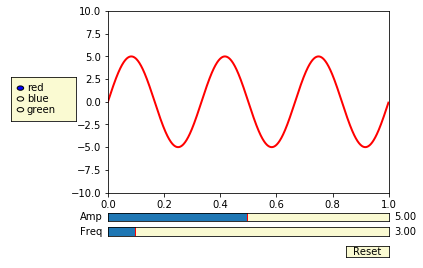

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()